## **Exploratory Data Analysis (EDA)**

### **Table of Contents**
- [Introduction](#introduction)
- [Step 1: Import required libraries](#step-1-import-required-libraries)
- [Step 2: Load the dataset](#step-2-load-the-dataset)
- [Step 3: Check for missing values](#step-3-check-for-missing-values)
- [Step 4: Generate descriptive statistics](#step-4-generate-descriptive-statistics)
- [Step 5: Visualize house price distribution](#step-5-visualize-house-price-distribution)
- [Step 6: Explore feature correlations](#step-6-explore-feature-correlations)
- [Step 7: Scatter plot — Square Footage vs Price](#step-7-scatter-plot--square-footage-vs-price)
- [Step 8: Distribution of houses by location](#step-8-distribution-of-houses-by-location)
- [Step 9: Average house price by bedroom count](#step-9-average-house-price-by-bedroom-count)


<a id="introduction"></a>
### **Introduction**

This notebook performs **exploratory data analysis (EDA)** on the house price dataset.  
The goal is to understand the data distribution, detect patterns, and uncover potential issues before feature engineering and modelling.


<a id="step-1-import-required-libraries"></a>
### **Step 1: Import required libraries**

This step imports essential Python libraries:
- `pandas` and `numpy` for data manipulation.  
- `matplotlib` and `seaborn` for visualisation.  

In [11]:
# -------------------------------------------------------------
# Step 1: Import required libraries
# -------------------------------------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<a id="step-2-load-the-dataset"></a>
### **Step 2: Load the dataset**

The dataset is loaded from `../data/raw/house_data.csv`.  
Key actions:
- Print dataset shape (rows, columns).  
- Display schema and data types for each column. 

In [12]:
# -------------------------------------------------------------
# Step 2: Load the dataset
# -------------------------------------------------------------
df = pd.read_csv('../data/raw/house_data.csv')

# ℹ️ Display basic information about the dataset
print(f"📐 Dataset shape (rows, columns): {df.shape}")
print("\n📊 Dataset Info:")
print(df.info())

📐 Dataset shape (rows, columns): (84, 7)

📊 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   price       84 non-null     int64  
 1   sqft        84 non-null     int64  
 2   bedrooms    84 non-null     int64  
 3   bathrooms   84 non-null     float64
 4   location    84 non-null     object 
 5   year_built  84 non-null     int64  
 6   condition   84 non-null     object 
dtypes: float64(1), int64(4), object(2)
memory usage: 4.7+ KB
None


<a id="step-3-check-for-missing-values"></a>
### **Step 3: Check for missing values**

Check for missing values across all columns.  
This helps identify data quality issues and informs preprocessing strategies. 

In [13]:
# -------------------------------------------------------------
# Step 3: Check for missing values
# -------------------------------------------------------------
print("\n🔍 Missing values per column:")
print(df.isnull().sum())


🔍 Missing values per column:
price         0
sqft          0
bedrooms      0
bathrooms     0
location      0
year_built    0
condition     0
dtype: int64


<a id="step-4-generate-descriptive-statistics"></a>
### **Step 4: Generate descriptive statistics**

Produce summary statistics such as mean, standard deviation, min, and max for numeric columns.  
Useful for spotting unusual ranges or anomalies. 

In [14]:
# -------------------------------------------------------------
# Step 4: Generate descriptive statistics
# -------------------------------------------------------------
print("\n📋 Statistical Summary:")
print(df.describe())


📋 Statistical Summary:
              price         sqft   bedrooms  bathrooms   year_built
count  8.400000e+01    84.000000  84.000000  84.000000    84.000000
mean   6.285595e+05  2191.500000   2.857143   2.190476  1982.047619
std    3.591678e+05   650.017117   0.852252   0.828356    19.501563
min    2.490000e+05  1350.000000   2.000000   1.000000  1947.000000
25%    3.742500e+05  1695.000000   2.000000   1.500000  1965.000000
50%    5.110000e+05  1995.000000   3.000000   2.000000  1982.500000
75%    7.292500e+05  2590.000000   3.000000   2.500000  1995.500000
max    1.680000e+06  3850.000000   5.000000   4.500000  2019.000000


<a id="step-5-visualize-house-price-distribution"></a>
### **Step 5: Visualize house price distribution**

Plot the distribution of house prices with a histogram and KDE curve.  
This highlights:
- Overall distribution shape.  
- Skewness or presence of outliers.

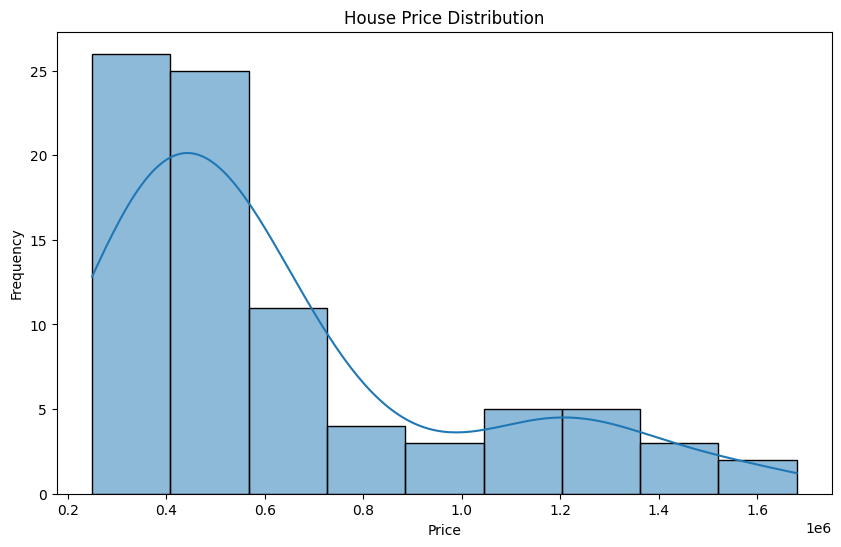

📊 Plotted house price distribution.


In [15]:
# -------------------------------------------------------------
# Step 5: Visualize house price distribution
# -------------------------------------------------------------
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], kde=True)
plt.title('House Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

print("📊 Plotted house price distribution.")

<a id="step-6-explore-feature-correlations"></a>
### **Step 6: Explore feature correlations**

Generate a correlation heatmap to examine relationships between numeric features.  
This provides insight into which features may be strongly associated with house prices.

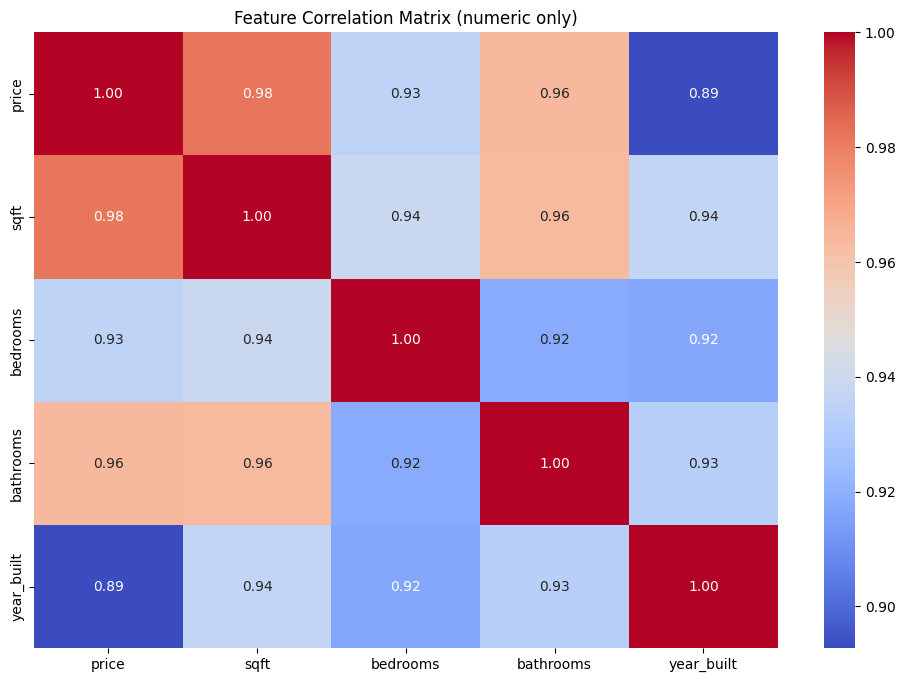

📈 Displayed feature correlation heatmap (numeric only).


In [16]:
# -------------------------------------------------------------
# Step 6: Explore feature correlations (numeric only)
# -------------------------------------------------------------
plt.figure(figsize=(12, 8))

num_df = df.select_dtypes(include="number")        # keep numeric columns only
corr = num_df.corr(numeric_only=True)              # Pearson by default

sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Matrix (numeric only)")
plt.show()

print("📈 Displayed feature correlation heatmap (numeric only).")


<a id="step-7-scatter-plot--square-footage-vs-price"></a>
### **Step 7: Scatter plot — Square Footage vs Price**

Plot a scatter chart comparing square footage (`sqft`) against `price`.  
This helps visualise whether larger homes generally command higher prices. 

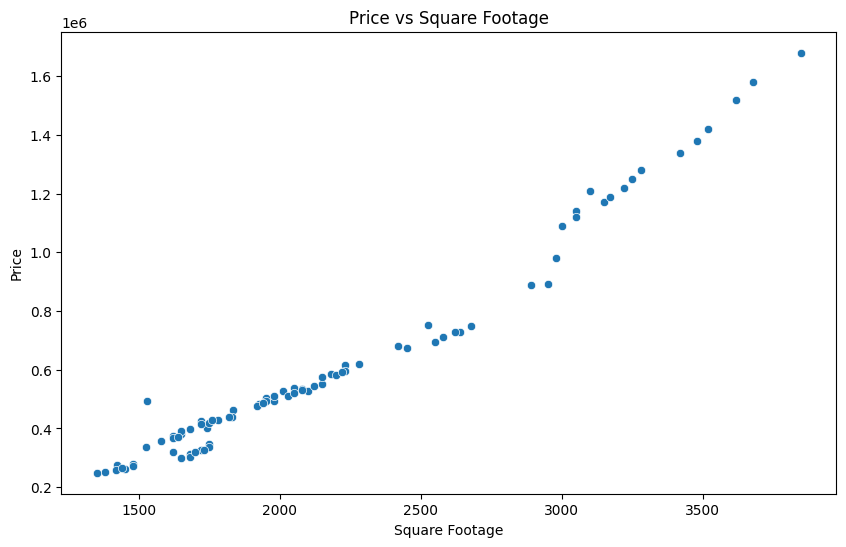

📐 Analyzed relation between square footage and price.


In [17]:
# -------------------------------------------------------------
# Step 7: Scatter plot — Square Footage vs Price
# -------------------------------------------------------------
plt.figure(figsize=(10, 6))
sns.scatterplot(x='sqft', y='price', data=df)
plt.title('Price vs Square Footage')
plt.xlabel('Square Footage')
plt.ylabel('Price')
plt.show()

print("📐 Analyzed relation between square footage and price.")


<a id="step-8-distribution-of-houses-by-location"></a>
### **Step 8: Distribution of houses by location**

Create a bar chart showing the number of houses in each location.  
This reveals how evenly or unevenly properties are distributed across regions. 

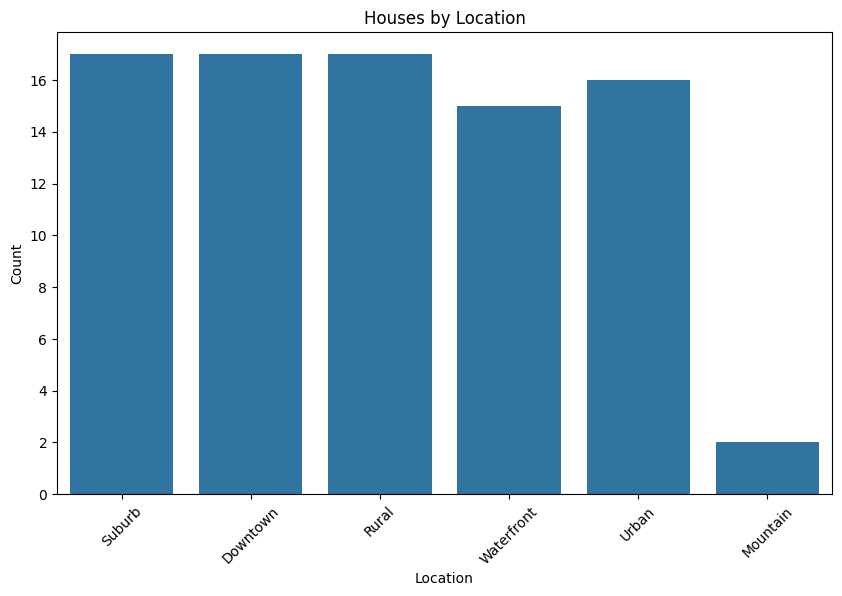

📍 Visualized distribution of houses by location.


In [18]:
# -------------------------------------------------------------
# Step 8: Distribution of houses by location
# -------------------------------------------------------------
plt.figure(figsize=(10, 6))
sns.countplot(x='location', data=df)
plt.title('Houses by Location')
plt.xlabel('Location')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

print("📍 Visualized distribution of houses by location.")

<a id="step-9-average-house-price-by-bedroom-count"></a>
### **Step 9: Average house price by bedroom count**

Display a bar plot of the average house price for each bedroom count.  
This helps assess whether more bedrooms typically correlate with higher prices.  

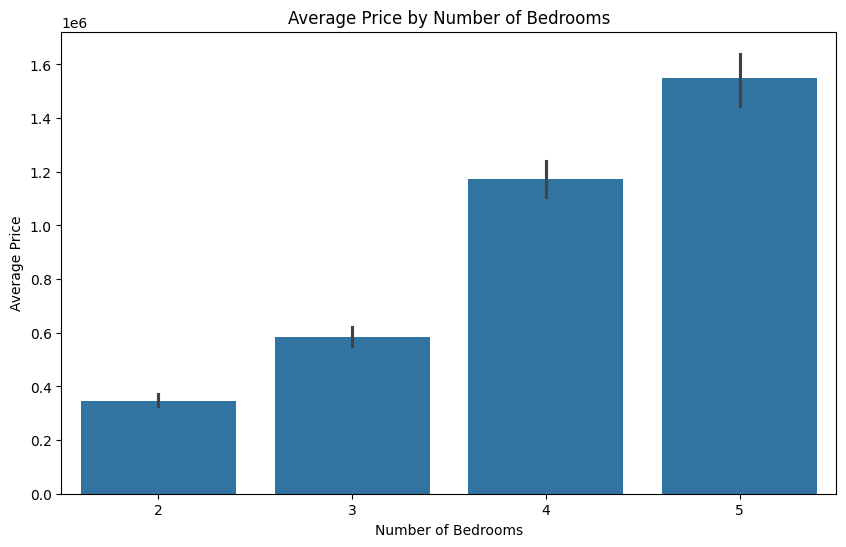

🛏️ Compared average prices based on bedroom count.


In [19]:
# -------------------------------------------------------------
# Step 9: Average house price by bedroom count
# -------------------------------------------------------------
plt.figure(figsize=(10, 6))
sns.barplot(x='bedrooms', y='price', data=df)
plt.title('Average Price by Number of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Average Price')
plt.show()

print("🛏️ Compared average prices based on bedroom count.")